In [1]:
# Setting for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn as sk

In [2]:
gold = yf.download('GLD', '2021-01-01', '2022-08-26', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


Let's have a quick analysis and see the types of data, number of rows and columns, column names and number of NA if any. 

In [3]:
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
quick_analysis(gold)

Data Types:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
Rows and Columns:
(415, 5)
Column Names:
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Null Values:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


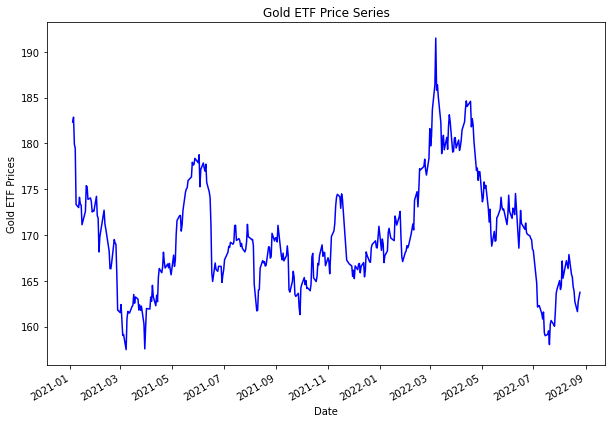

In [4]:
# Plot the closing price of GLD
gold.Close.plot(figsize=(10, 7),color='b')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show() 

In [5]:
# Define explanatory variables- 3 and 9 months rolling means 
gold['S_3'] = gold['Close'].rolling(window=3).mean()
gold['S_9'] = gold['Close'].rolling(window=9).mean()
gold['next_day_price'] = gold['Close'].shift(1)

X = gold.dropna()[['S_3', 'S_9']]

# Define dependent variable - next day price
y = gold.dropna()[['next_day_price']]

In [6]:
import random
X.sample(frac = 1)
# Split the Close data into train and test dataset - 80% / 20%
t = .8
t = int(t*len(gold))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [7]:
from sklearn.linear_model import  LinearRegression
# Fit the data to the model
lin_reg = LinearRegression()  # Create and instance 
reg = lin_reg.fit(X_train, y_train)

In [8]:
# Print the coefficient and intercept
print("Coefficient:", reg.coef_, "Intercept:",reg.intercept_, "Score:", reg.score(X_test, y_test))

Coefficient: [[ 1.06498699 -0.06146842]] Intercept: [-0.59674257] Score: 0.9780732939707393


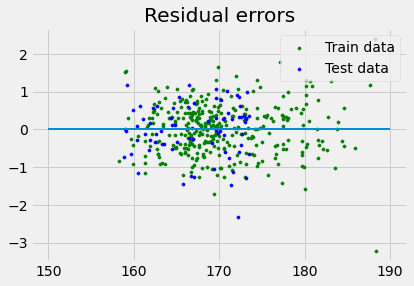

In [9]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 150, xmax = 190, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = reg.predict(X_test)

# Printout relevant metrics
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[ 1.06498699 -0.06146842]]
Mean Absolute Error: 0.5461236071497471
Coefficient of Determination: 0.9780732939707393


In [11]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

                Actual   Predicted
Date                              
2022-05-10  172.880005  173.163687
2022-05-11  171.419998  172.268772
2022-05-12  172.820007  171.352764
2022-05-13  170.169998  170.452180
2022-05-16  168.789993  169.618288
...                ...         ...
2022-08-19  163.919998  163.524025
2022-08-22  162.720001  162.599958
2022-08-23  161.639999  162.219103
2022-08-24  162.770004  162.428355
2022-08-25  163.250000  163.205534

[75 rows x 2 columns]
